In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

In [5]:
MOM_IC = xr.open_dataset('Initial_state.nc')

In [6]:
MOM_IC

<xarray.Dataset>
Dimensions:          (lath: 2, lonh: 40, latq: 3, lonq: 41, Layer: 20,
                      Interface: 21, Time: 1)
Coordinates:
  * lath             (lath) float64 32.5 37.5
  * lonh             (lonh) float64 2.5 7.5 12.5 17.5 ... 187.5 192.5 197.5
  * latq             (latq) float64 30.0 35.0 40.0
  * lonq             (lonq) float64 0.0 5.0 10.0 15.0 ... 190.0 195.0 200.0
  * Layer            (Layer) float64 100.0 300.0 500.0 ... 3.7e+03 3.9e+03
  * Interface        (Interface) float64 0.0 200.0 400.0 ... 3.8e+03 4e+03
  * Time             (Time) timedelta64[ns] 00:00:00
Data variables: (12/19)
    Temp             (Time, Layer, lath, lonh) float64 ...
    Salt             (Time, Layer, lath, lonh) float64 ...
    h                (Time, Layer, lath, lonh) float64 ...
    u                (Time, Layer, lath, lonq) float64 ...
    v                (Time, Layer, latq, lonh) float64 ...
    p_surf_EOS       (Time, lath, lonh) float64 ...
    ...               ...
    diffu            (Time, Layer, lath, lonq) float64 ...
    diffv            (Time, Layer, latq, lonh) float64 ...
    ubtav            (Time, lath, lonq) float64 ...
    vbtav            (Time, latq, lonh) float64 ...
    DTBT             (Time) timedelta64[ns] ...
    eta              (Time, Interface, lath, lonh) float64 ...
Attributes:
    filename:  ./Initial_state.nc

In [18]:
ideal_salt = xr.zeros_like(MOM_IC.Salt) + (MOM_IC.eta.isel(Interface = 0)-MOM_IC.h.cumsum('Layer')+MOM_IC.h/2)*(36-34)/(-4000) + 34


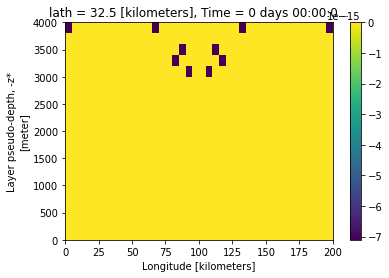

In [19]:
(ideal_salt - MOM_IC.Salt).isel(lath = 0).plot()

Note:
```
! === module MOM_coord_initialization ===
COORD_CONFIG = "ts_range"       ! default = "none"
                                ! This specifies how layers are to be defined:
                                !     ALE or none - used to avoid defining layers in ALE mode
                                !     file - read coordinate information from the file
                                !       specified by (COORD_FILE).
                                !     BFB - Custom coords for buoyancy-forced basin case
                                !       based on SST_S, T_BOT and DRHO_DT.
                                !     linear - linear based on interfaces not layers
                                !     layer_ref - linear based on layer densities
                                !     ts_ref - use reference temperature and salinity
                                !     ts_range - use range of temperature and salinity
                                !       (T_REF and S_REF) to determine surface density
                                !       and GINT calculate internal densities.
                                !     gprime - use reference density (RHO_0) for surface
                                !       density and GINT calculate internal densities.
                                !     ts_profile - use temperature and salinity profiles
                                !       (read from COORD_FILE) to set layer densities.
                                !     USER - call a user modified routine.
T_REF = 0.0                     !   [degC] default = 10.0
                                ! The default initial temperatures.
TS_RANGE_T_LIGHT = 0.0          !   [degC] default = 0.0
                                ! The initial temperature of the lightest layer when COORD_CONFIG is set to
                                ! ts_range.
TS_RANGE_T_DENSE = 0.0          !   [degC] default = 0.0
                                ! The initial temperature of the densest layer when COORD_CONFIG is set to
                                ! ts_range. 
S_REF = 34.0                    !   [ppt] default = 35.0
                                ! The default initial salinities.  
TS_RANGE_S_LIGHT = 34.05        !   [ppt] default = 34.0
                                ! The initial lightest salinities when COORD_CONFIG is set to ts_range.
TS_RANGE_S_DENSE = 35.95        !   [ppt] default = 34.0
                                ! The initial densest salinities when COORD_CONFIG is set to ts_range.
TS_RANGE_RESOLN_RATIO = 1.0     !   [nondim] default = 1.0
                                ! The ratio of density space resolution in the densest part of the range to that
                                ! in the lightest part of the range when COORD_CONFIG is set to ts_range. Values
                                ! greater than 1 increase the resolution of the denser water.
```


# try with minthickness 1e-12

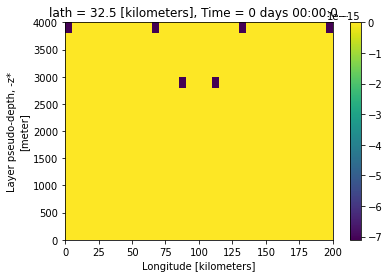

In [7]:
ideal_salt = xr.zeros_like(MOM_IC.Salt) + (MOM_IC.eta.isel(Interface = 0)-MOM_IC.h.cumsum('Layer')+MOM_IC.h/2)*(36-34)/(-4000) + 34
(ideal_salt - MOM_IC.Salt).isel(lath = 0).plot()

KHTH0-MINTHICK1e-12-MWIPGF
5.942668e-11
KHTH-MINTHICK1e-12-MWIPGF
5.942668e-11
KHTH0-MINTHICK1e-1-MWIPGF
0.005092493
KHTH0-MINTHICK1e-12
1.9063622e-05
KHTH-MINTHICK1e-1
3.9355902e-13
KHTH0-MINTHICK1e-1
3.9355902e-13
KHTH0-MINTHICK1e-6-MWIPGF
8.211349e-13
KHTH0-MINTHICK1e-6
0.0012863294
KHTH0-MINTHICK1e-3-MWIPGF
8.21806e-07
KHTH0-MINTHICK1e-3
9.85602e-12
KHTH0-MINTHICK1e-9-MWIPGF
3.6168917e-13
KHTH0-MINTHICK1e-9
0.0019371457
KHTH0-MINTHICK1e-1-MontgP
0.010961192
KHTH0-MINTHICK1e-12-MontgP
0.009103272


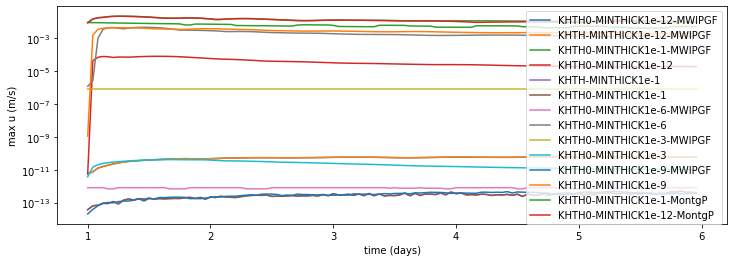

In [2]:
fig, axes = plt.subplots(figsize = (12,4))
for i in np.arange(14):
    label = ['KHTH0-MINTHICK1e-12-MWIPGF','KHTH-MINTHICK1e-12-MWIPGF',
             'KHTH0-MINTHICK1e-1-MWIPGF','KHTH0-MINTHICK1e-12',
             'KHTH-MINTHICK1e-1','KHTH0-MINTHICK1e-1',
             'KHTH0-MINTHICK1e-6-MWIPGF','KHTH0-MINTHICK1e-6',
             'KHTH0-MINTHICK1e-3-MWIPGF','KHTH0-MINTHICK1e-3',
             'KHTH0-MINTHICK1e-9-MWIPGF','KHTH0-MINTHICK1e-9',
             'KHTH0-MINTHICK1e-1-MontgP','KHTH0-MINTHICK1e-12-MontgP'][i]
    prog = xr.open_dataset('archive/prog-'+label+'.nc')
    plt.plot(np.arange(len(prog.Time))/24+1,prog.u.max(['xq','yh','zl']).values, label = label)
    print(label)
    print(prog.u.max(['xq','yh','zl']).values[-1])
plt.ylabel('max u (m/s)')
plt.xlabel('time (days)')
plt.legend()
plt.yscale('log')
plt.show()
#prog.u.isel(yh = 0, Time = -1).plot()

Let's look at momentum budget?

stronger strat in seamount TS than isomip TS - maybe makes montgomery worse?